## EDA -Incidentes viales CDMX C5

La base de datos utilizada es la de Incidentes viales reportados por el Centro de Comando, Control, Cómputo, Comunicaciones y Contacto Ciudadano de la Ciudad de México (C5), la cual tiene información desde 2014 y actualizado mensualmente. 

### Diccionario de datos

folio: El folio único que tiene cada llamada que se registra<br>
fecha_creacion: Fecha en la que se realizó la llamada<br>
hora_creacion: Hora de creación de la llamada telefónica<br>
dia_semana: El día de la semana que se realizó la llamada(Lunes a Domingo)<br>
fecha_cierre: Fecha del cierre del reporte<br>
año_cierre:Año en el que se cerró el reporte de la llamada<br>
mes_cierre:Mes en el que se cerró el reporte de la llamada<br>
hora_cierre: Hora en la que se cerró el reporte de la llamada<br>
delegacion_inicio: Delegación en la que sucedió el accidente<br>
incidente_c4:Tipo de incidente reportado<br>
latitud: De donde sucedió el incidente<br>
longitud: De donde sucedió el incidente<br>
codigo_cierre: Clasificación de la llamada de acuerdo a un código de cierre<br>

A = “Afirmativo”: Una unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada.<br>
N = “Negativo”: Una unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie confirmo la emergencia ni fue solicitado el apoyo de la unidad.<br>
I = “Informativo”: Corresponde a solicitudes de información.<br>
F = “Falso”: El incidente reportado inicialmente fue considerado como falso en el lugar de los hechos.<br>
D = “Duplicados”: El incidente reportado se registró en dos o más ocasiones procediendo a mantener un solo reporte como el original.<br>

clas_con_f_alarma:Clasificacion de la alarma reportada<br>
tipo_entrada:Entrada con la cual se registro la llamada<br>
delegacion_cierre:Delegación en la que se cerró el reporte de la llamada<br>
geopoint:Geolocalización del incidente reportado<br>
mes:Mes en número en el que se realizó la llamada.

### 1) Carga de información y conocimiento de variables

In [1]:
#Librerias utilizadas
import load_data
import transform_data
import eda
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#datos_c5=load_data.carga_archivo('incidentes-viales-c5.csv')
datos_copy=load_data.carga_archivo('incidentes-viales-c5.csv')

In [3]:
#datos_c5.head(3)

In [4]:
#datos_copy=datos_c5.copy()  #Hacemos una copia del archivo original para trabajar con la copia
load_data.observaciones_variables(datos_copy)

Número de observaciones: 1303778 , Número de variables: 18 



In [5]:
datos_copy.columns

Index(['folio', 'fecha_creacion', 'hora_creacion', 'dia_semana',
       'codigo_cierre', 'fecha_cierre', 'año_cierre', 'mes_cierre',
       'hora_cierre', 'delegacion_inicio', 'incidente_c4', 'latitud',
       'longitud', 'clas_con_f_alarma', 'tipo_entrada', 'delegacion_cierre',
       'geopoint', 'mes'],
      dtype='object')

El nombre de las variables ya esta estandarizada y utiliza un formato "snake_case"

### 2) Limpieza de datos

Los registros tienen un formato inadecuado para el análisis, por lo que pasaremos todos los registros a minúsculas y eliminaremos acentos en algunas variables tipo <i>Object</i>.

In [6]:
transform_data.tipo_variables(datos_copy)


Tipo de variables:
 folio                 object
fecha_creacion        object
hora_creacion         object
dia_semana            object
codigo_cierre         object
fecha_cierre          object
año_cierre             int64
mes_cierre            object
hora_cierre           object
delegacion_inicio     object
incidente_c4          object
latitud              float64
longitud             float64
clas_con_f_alarma     object
tipo_entrada          object
delegacion_cierre     object
geopoint              object
mes                    int64
dtype: object


Las variables de fecha no tienen el tipo adecuado por lo que haremos la transformación. Además se agrega la *hora_entera* para facilitar el análisis. El resto de los tipos de variables son adecuados.

In [117]:
datos_copy['fecha_creacion'] = pd.to_datetime(datos_copy['fecha_creacion'], format='%d/%m/%Y', errors='coerce')
datos_copy['hora_entera'] = pd.to_datetime(datos_copy['hora_creacion'], format='%H:%M:%S', errors='coerce').dt.hour
datos_copy['hora_creacion'] = pd.to_datetime(datos_copy['hora_creacion'], format='%H:%M:%S', errors='coerce').dt.time
datos_copy['fecha_cierre'] = pd.to_datetime(datos_copy['fecha_cierre'], format='%d/%m/%Y', errors='coerce')
datos_copy['hora_cierre'] = pd.to_datetime(datos_copy['hora_cierre'], format='%H:%M:%S', errors='coerce').dt.time

In [118]:
datos_copy.dtypes

folio                        object
fecha_creacion       datetime64[ns]
hora_creacion                object
dia_semana                   object
codigo_cierre                object
fecha_cierre         datetime64[ns]
año_cierre                    int64
mes_cierre                   object
hora_cierre                  object
delegacion_inicio            object
incidente_c4                 object
clas_con_f_alarma            object
tipo_entrada                 object
delegacion_cierre            object
mes                           int64
codigo_cierre_std            object
target                        int64
hora_entera                 float64
dtype: object

A continuación cambiamos a minúsculas.

In [9]:
transform_data.cambiar_minusculas_variable(datos_copy,'folio')
transform_data.cambiar_minusculas_variable(datos_copy,'dia_semana')
transform_data.cambiar_minusculas_variable(datos_copy,'codigo_cierre')
transform_data.cambiar_minusculas_variable(datos_copy,'mes_cierre')
transform_data.cambiar_minusculas_variable(datos_copy,'delegacion_inicio')
transform_data.cambiar_minusculas_variable(datos_copy,'incidente_c4')
transform_data.cambiar_minusculas_variable(datos_copy,'clas_con_f_alarma')
transform_data.cambiar_minusculas_variable(datos_copy,'tipo_entrada')
transform_data.cambiar_minusculas_variable(datos_copy,'delegacion_cierre')
#transform_data.quitar_acentos(datos_copy)

In [37]:
datos_copy.head(3)

folio fecha_creacion hora_creacion dia_semana  \
0  ga/160123/05714     2016-01-23      22:35:00     sábado   
1  ao/160123/05826     2016-01-23      22:50:00     sábado   
2  c4/160124/02187     2016-01-24      09:40:00    domingo   

                                       codigo_cierre fecha_cierre  año_cierre  \
0  (a) la unidad de atención a emergencias fue de...   2016-01-24        2016   
1  (a) la unidad de atención a emergencias fue de...   2016-01-24        2016   
2  (n) la unidad de atención a emergencias fue de...   2016-01-24        2016   

  mes_cierre hora_cierre    delegacion_inicio  \
0      enero    00:21:00  venustiano carranza   
1      enero    04:40:00           cuajimalpa   
2      enero    11:13:00              tlalpan   

                      incidente_c4  clas_con_f_alarma      tipo_entrada  \
0  accidente-choque sin lesionados         emergencia  botón de auxilio   
1  accidente-choque con lesionados  urgencias medicas  botón de auxilio   
2  accidente-choque sin lesionados         emergencia   llamada del 066   

     delegacion_cierre  mes codigo_cierre_std  target  
0  venustiano carranza    1                 a       1  
1           cuajimalpa    1                 a       1  
2              tlalpan    1                 n       0

### 3) Data Profiling

##### Variables numéricas
Se eliminarán por el momento las variables latitud, longitud y geopoint de las base porque por el momento no son de interes para el análisis exploratorio.

In [11]:
datos_copy=datos_copy.drop(columns=['latitud', 'longitud','geopoint'])

In [12]:
pd.options.display.float_format = '{:.2f}'.format
eda.tabla_estadisticos_descriptivos_variables_numericas(datos_copy)

año_cierre        mes
max               2020.00      12.00
min               2014.00       1.00
mean              2016.84       6.57
std                  1.77       3.53
q25               2015.00       3.00
median            2017.00       7.00
q75               2018.00      10.00
skew                -0.11      -0.03
kurt                -1.11      -1.28
count          1303778.00 1303778.00
uniques              7.00      12.00
missings             0.00       0.00
prop_missings        0.00       0.00

En las variables numéricas <i>año_cierre</i> y <i>mes</i> no se encontraron datos faltantes.

##### Variables categóricas

In [13]:
eda.tabla_estadisticos_descriptivos_variables_categoricas(datos_copy)

folio  \
count                                                    1303778   
uniques                                                  1303778   
uniques_list   [ga/160123/05714, ao/160123/05826, c4/160124/0...   
missings                                                       0   
prop_missings                                               0.00   

                                                   hora_creacion  \
count                                                    1303129   
uniques                                                    86271   
uniques_list   [22:35:04, 22:50:49, 09:40:11, 22:40:57, 04:25...   
missings                                                     649   
prop_missings                                               0.05   

                                                      dia_semana  \
count                                                    1303778   
uniques                                                        7   
uniques_list   [sábado, domingo, lunes, martes, miércoles, ju...   
missings                                                       0   
prop_missings                                               0.00   

                                                   codigo_cierre  \
count                                                    1303778   
uniques                                                        5   
uniques_list   [(a) la unidad de atención a emergencias fue d...   
missings                                                       0   
prop_missings                                               0.00   

                                                      mes_cierre  \
count                                                    1303778   
uniques                                                       12   
uniques_list   [enero, febrero, marzo, septiembre, octubre, m...   
missings                                                       0   
prop_missings                                               0.00   

                                                     hora_cierre  \
count                                                    1303131   
uniques                                                    86362   
uniques_list   [00:21:08, 04:40:37, 11:13:03, 22:55:51, 05:03...   
missings                                                     647   
prop_missings                                               0.05   

                                               delegacion_inicio  \
count                                                    1303622   
uniques                                                       16   
uniques_list   [venustiano carranza, cuajimalpa, tlalpan, mag...   
missings                                                     156   
prop_missings                                               0.01   

                                                    incidente_c4  \
count                                                    1303778   
uniques                                                       23   
uniques_list   [accidente-choque sin lesionados, accidente-ch...   
missings                                                       0   
prop_missings                                               0.00   

                                               clas_con_f_alarma  \
count                                                    1303778   
uniques                                                        4   
uniques_list   [emergencia, urgencias medicas, falsa alarma, ...   
missings                                                       0   
prop_missings                                               0.00   

                                                    tipo_entrada  \
count                                                    1303778   
uniques                                                        8   
uniques_list   [botón de auxilio, llamada del 066, radio, cám...   
missings                                                       0   
prop_missings                         

Se encontró que en las variables categóricas hay datos faltantes para ciertas delegaciones.

A continuación se hará una estandarización de las variables <i>codigo_cierre</i> y <i>tipo_entrada</i>
Para <i>codigo_cierre</i> dejaremos únicamente las letras que definen este código, es decir elimaremos la descripción asociada, y para <i>tipo_entrada</i>

In [14]:
def estandariza_cod_cierre(codigo):
    if codigo=="(a) la unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada":
        return "a"
    elif codigo=="(n) la unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie solicitó el apoyo de la unidad":
        return "n"
    elif codigo=="(d) el incidente reportado se registró en dos o más ocasiones procediendo a mantener un único reporte (afirmativo, informativo, negativo o falso) como el identificador para el incidente":
        return "d"
    elif codigo=="(f) el operador/a o despachador/a identifican, antes de dar respuesta a la emergencia, que ésta es falsa. o al ser despachada una unidad de atención a emergencias en el lugar de los hechos se percatan que el incidente no corresponde al reportado inicialmente":
        return "f"
    elif codigo=="(i) el incidente reportado es afirmativo y se añade información adicional al evento":
        return "i"
    else:
        return "no especifica"

In [15]:
datos_copy['codigo_cierre_std'] = datos_copy.codigo_cierre.str.slice(1,2)

In [16]:
datos_copy.codigo_cierre_std.unique()

array(['a', 'n', 'd', 'f', 'i'], dtype=object)

Se crea la variable <i>target</i> que es en esta caso una dummy, 1 para el paso en que la llamada fue **afirmativa** y 0 en otro caso. Esto porque el modelo que desarrollaremos más adelante consite en predecir si una nueva llamada es probable que sea afirmativa.

In [67]:
datos_copy['target']=np.where((datos_copy['codigo_cierre_std']=='a')|(datos_copy['codigo_cierre_std']=='i'),1,0)

In [116]:
datos_copy.head(3)

folio fecha_creacion hora_creacion dia_semana  \
0  ga/160123/05714     2016-01-23      22:35:00     sábado   
1  ao/160123/05826     2016-01-23      22:50:00     sábado   
2  c4/160124/02187     2016-01-24      09:40:00    domingo   

                                       codigo_cierre fecha_cierre  año_cierre  \
0  (a) la unidad de atención a emergencias fue de...   2016-01-24        2016   
1  (a) la unidad de atención a emergencias fue de...   2016-01-24        2016   
2  (n) la unidad de atención a emergencias fue de...   2016-01-24        2016   

  mes_cierre hora_cierre    delegacion_inicio  \
0      enero    00:21:00  venustiano carranza   
1      enero    04:40:00           cuajimalpa   
2      enero    11:13:00              tlalpan   

                      incidente_c4  clas_con_f_alarma      tipo_entrada  \
0  accidente-choque sin lesionados         emergencia  botón de auxilio   
1  accidente-choque con lesionados  urgencias medicas  botón de auxilio   
2  accidente-choque sin lesionados         emergencia   llamada del 066   

     delegacion_cierre  mes codigo_cierre_std  target hora_entera  
0  venustiano carranza    1                 a       1      object  
1           cuajimalpa    1                 a       1      object  
2              tlalpan    1                 n       0      object

La relación entre *codigo_cierre* y *clas_con_f_alarma* se puede ver en la siguiente tabla

In [110]:
pd.crosstab(datos_copy.clas_con_f_alarma,datos_copy.codigo_cierre)

codigo_cierre      (a) la unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada  \
clas_con_f_alarma                                                                                                                            
delito                                                           222                                                                         
emergencia                                                    348787                                                                         
falsa alarma                                                       4                                                                         
urgencias medicas                                             222548                                                                         

codigo_cierre      (d) el incidente reportado se registró en dos o más ocasiones procediendo a mantener un único reporte (afirmativo, informativo, negativo o falso) como el identificador para el incidente  \
clas_con_f_alarma                                                                                                                                                                                              
delito                                                           396                                                                                                                                           
emergencia                                                    220547                                                                                                                                           
falsa alarma                                                       0                                                                                                                                           
urgencias medicas                                             238829                                                                                                                                           

codigo_cierre      (f) el operador/a o despachador/a identifican, antes de dar respuesta a la emergencia, que ésta es falsa. o al ser despachada una unidad de atención a emergencias en el lugar de los hechos se percatan que el incidente no corresponde al reportado inicialmente  \
clas_con_f_alarma                                                                                                                                                                                                                                                                       
delito                                                             0                                                                                                                                                                                                                    
emergencia                                                         1                                                                                                                                                                                                                    
falsa alarma                                                   10167                                                                                                                                                                                                                    
urgencias medicas                                                  0                                                                                                                                                                                                                    

codigo_cierre      (i) el incidente reportado es afirmativo y se añade información adicional al evento  \
clas_con_f_alarma                                                                                        

### 4) Análisis Exploratorio

##### 4.1 Frecuencias

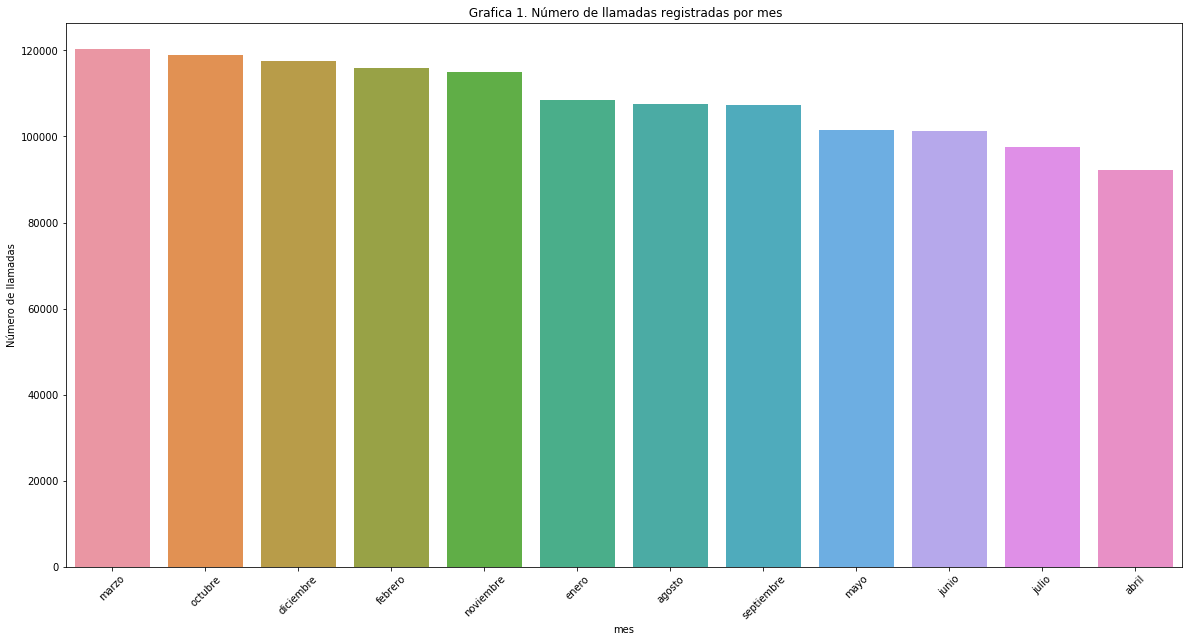

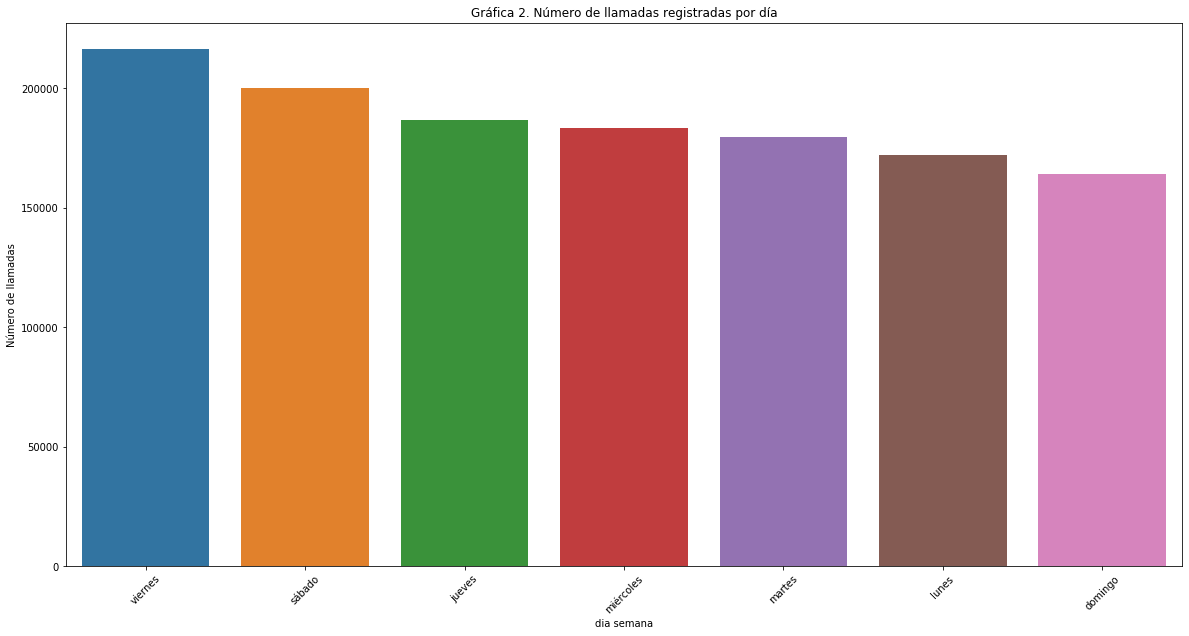

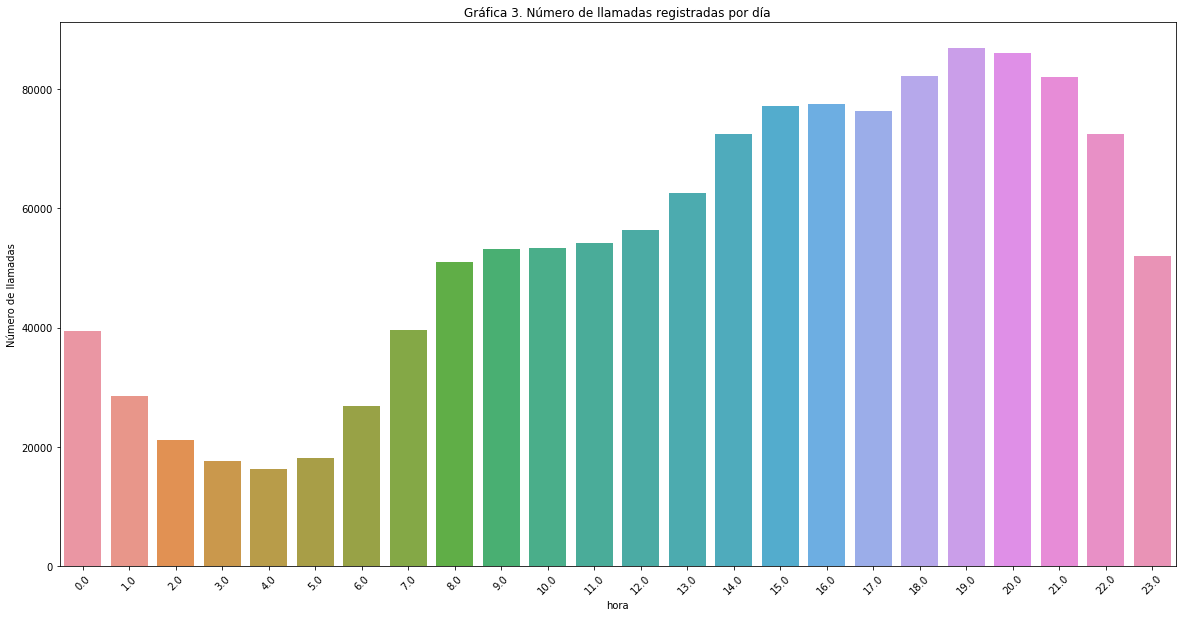

In [121]:
incidentes_por_mes=sns.countplot(x="mes_cierre", data=datos_copy,order = datos_copy['mes_cierre'].value_counts().index)
incidentes_por_mes.set_xticklabels(incidentes_por_mes.get_xticklabels(), rotation=45)
incidentes_por_mes.set(xlabel="mes",ylabel="Número de llamadas", title=" Grafica 1. Número de llamadas registradas por mes")
plt.show()
incidentes_por_dia=sns.countplot(x="dia_semana", data=datos_copy,order = datos_copy['dia_semana'].value_counts().index)
incidentes_por_dia.set_xticklabels(incidentes_por_dia.get_xticklabels(), rotation=45)
incidentes_por_dia.set(xlabel="dia semana",ylabel="Número de llamadas", title="Gráfica 2. Número de llamadas registradas por día")
plt.show()
incidentes_por_dia=sns.countplot(x="hora_entera", data=datos_copy)
incidentes_por_dia.set_xticklabels(incidentes_por_dia.get_xticklabels(), rotation=45)
incidentes_por_dia.set(xlabel="hora",ylabel="Número de llamadas", title="Gráfica 3. Número de llamadas registradas por día")
plt.show()

De acuerdo al conteo de las llamadas por mes (Gráfica 1) y por día de la semana (Gráfica 2), podemos afirmar que el mes en el que ocurren mayor número de llamadas es marzo y curiosamente el mes de abril(consecutivo) es el que menos casos de llamadas tiene. De igual forma el día de la semana que mayor número de llamadas tiene es el viernes, lo cual es bastante factible porque es fin de semana y muchas personas salen de su rutina en ese día, del mismo modo el día domingo es el que menos casos tiene registrado pues se espera que en ese día la gente descanse. Además, las horas de mayor llamadas es entre las 6pm y las 9pm, que es lo que se espera al haber mayor actividad a esa hora.

[Text(0, 0.5, 'Llamadas'),
 Text(0.5, 0, 'Tipo de entrada'),
 Text(0.5, 1.0, 'Gráfica 8. Número de llamadas registradas según el origen/tipo de entrada')]

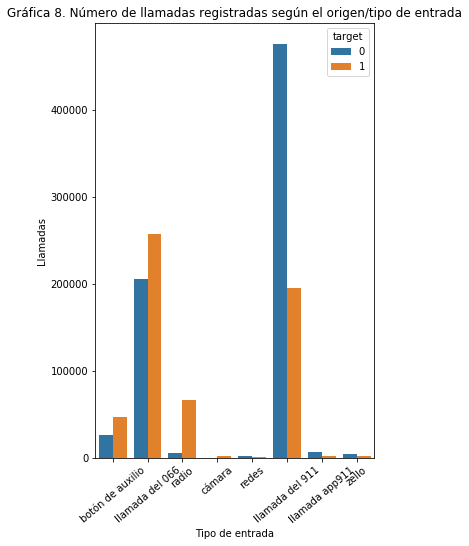

In [70]:
plt.rcParams["figure.figsize"] = (5,8)
g=sns.countplot(x="tipo_entrada", hue="target", data=datos_copy)
g.set_xticklabels(g.get_xticklabels(), rotation=40)
g.set(xlabel="Tipo de entrada",ylabel="Llamadas", title="Gráfica 8. Número de llamadas registradas según el origen/tipo de entrada")

Con la información de la gráfica 8, que la variable target tiene mas casos positivos en todos los tipos entrada ( medio por el cual se comunican las personas), excepto en la llamadas al 911, justamente en ese caso hay menos casos positivos de las llamadas registradas.

[Text(0, 0.5, 'Llamadas'),
 Text(0.5, 0, 'Incidente'),
 Text(0.5, 1.0, 'Gráfica 9. Número de llamadas registradas de acuerdo a la variable objetivo por incidente')]

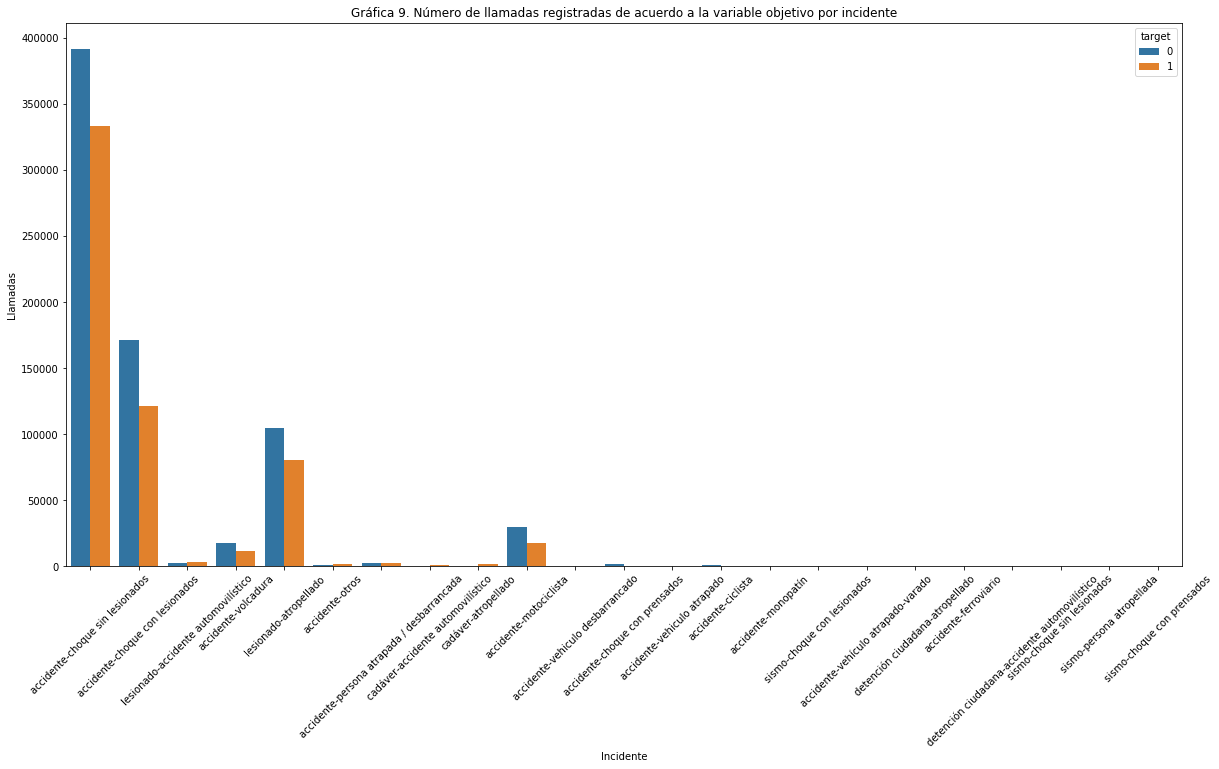

In [103]:
plt.rcParams["figure.figsize"] = (20,10)
g=sns.countplot(x="incidente_c4", hue="target", data=datos_copy)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set(xlabel="Incidente",ylabel="Llamadas", title="Gráfica 9. Número de llamadas registradas de acuerdo a la variable objetivo por incidente")

[Text(0, 0.5, 'Llamadas'),
 Text(0.5, 0, 'Incidente'),
 Text(0.5, 1.0, 'Gráfica 9. Número de llamadas registradas de acuerdo a la variable objetivo por incidente')]

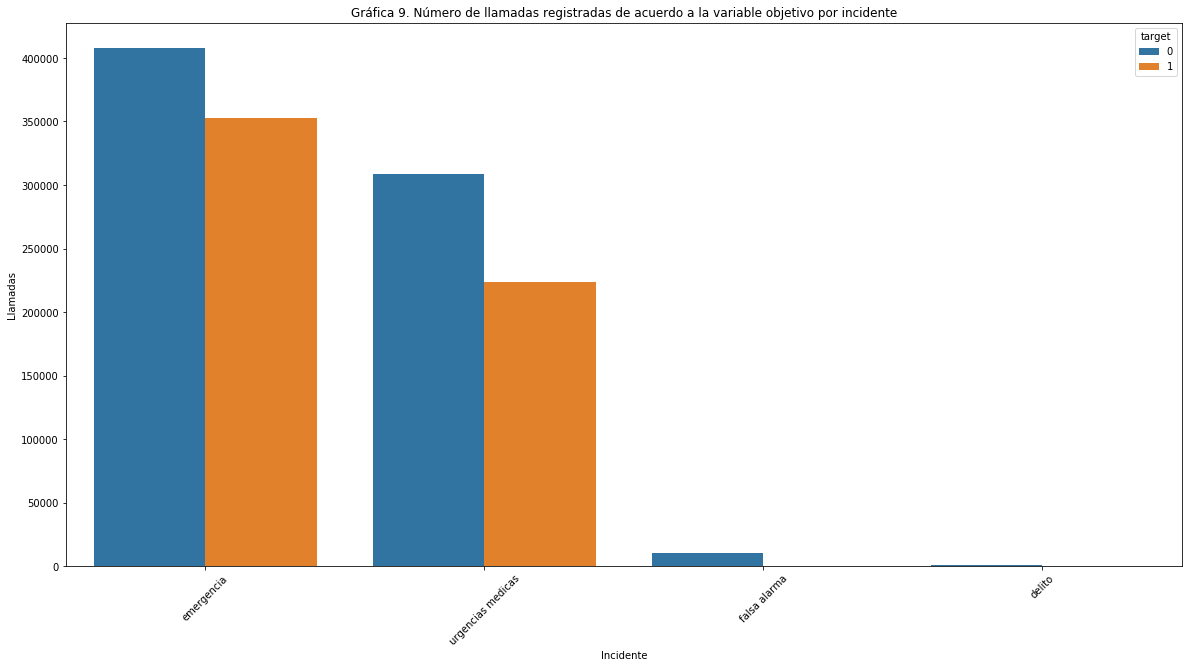

In [104]:
plt.rcParams["figure.figsize"] = (20,10)
g=sns.countplot(x="clas_con_f_alarma", hue="target", data=datos_copy)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set(xlabel="clas_con_f_alarma",ylabel="Llamadas", title="Gráfica 9. Número de llamadas registradas de acuerdo a la variable objetivo por clas_con_f_alarma")

[Text(0, 0.5, 'Llamadas'),
 Text(0.5, 0, 'Delegaciones'),
 Text(0.5, 1.0, 'Gráfica 9. Número de llamadas registradas de acuerdo a la variable objetivo por delegaciones')]

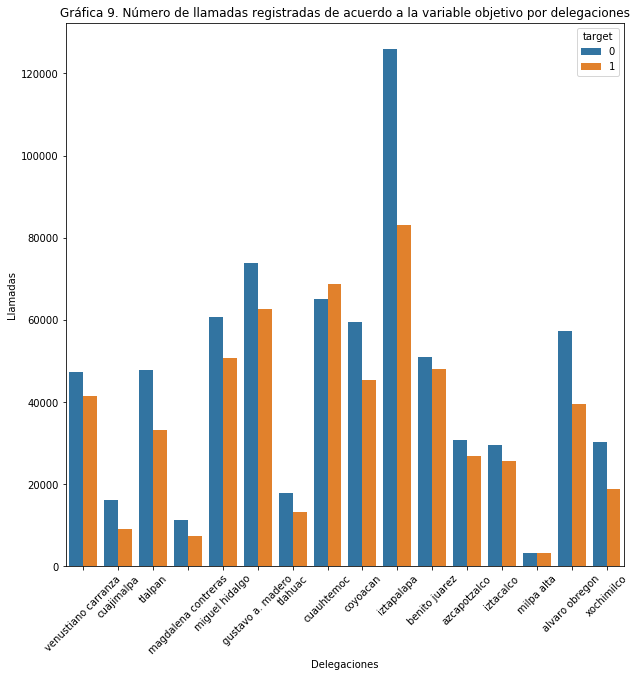

In [122]:
plt.rcParams["figure.figsize"] = (10,10)
g=sns.countplot(x="delegacion_inicio", hue="target", data=datos_copy)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set(xlabel="Delegaciones",ylabel="Llamadas", title="Gráfica 9. Número de llamadas registradas de acuerdo a la variable objetivo por delegaciones")

[Text(0, 0.5, 'Llamadas'),
 Text(0.5, 0, 'Hora'),
 Text(0.5, 1.0, 'Gráfica 9. Número de llamadas registradas de acuerdo a la variable objetivo por hora')]

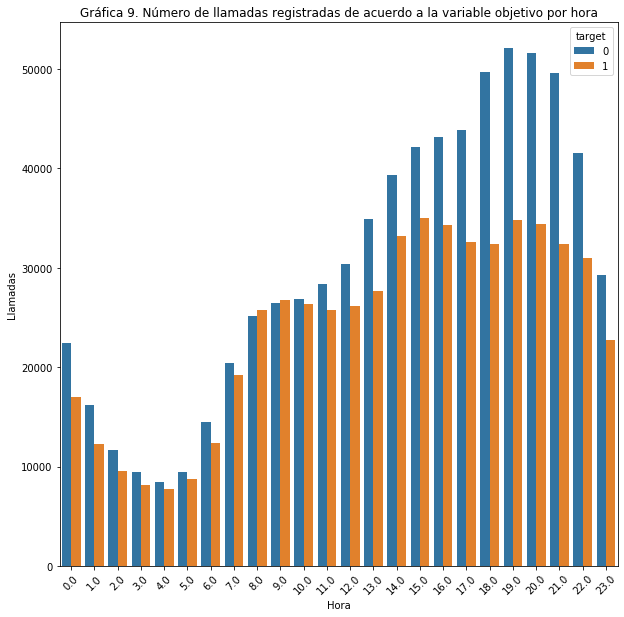

In [123]:
plt.rcParams["figure.figsize"] = (10,10)
g=sns.countplot(x="hora_entera", hue="target", data=datos_copy)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set(xlabel="Hora",ylabel="Llamadas", title="Gráfica 9. Número de llamadas registradas de acuerdo a la variable objetivo por hora")

En la gràfica 9, se indica que la delegación con mayores casos es iztapalapa y del mismo modo en esta delegación la mayoría de las llamadas **no** son afirmativas.

##### 4.2 Series de tiempo

[Text(0, 0.5, 'Número de llamadas'),
 Text(0.5, 0, 'años'),
 Text(0.5, 1.0, 'Grafica 3. Número de llamadas registradas por día a traves del tiempo')]

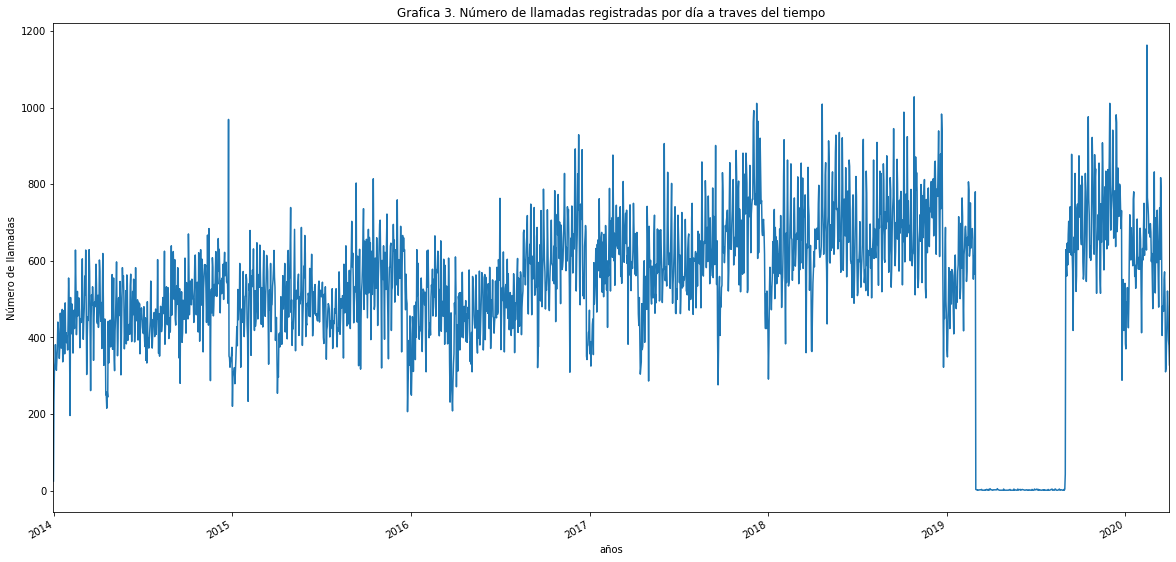

In [72]:
plt.rcParams["figure.figsize"] = (20,10)
llamadas_por_dia=datos_copy.groupby('fecha_creacion').folio.count().plot()
llamadas_por_dia.set(xlabel="años",ylabel="Número de llamadas", title="Grafica 3. Número de llamadas registradas por día a traves del tiempo")

De acuerdo a la Gráfica 3 de serie de tiempo de <i>llamadas por día</i> se observa el patrón de tendencia positiva, sin embargo existe un hueco entre los años 2019 y 2020, lo cual tendríamos que considerar para el modelado.

[Text(0, 0.5, 'Llamadas registradas por delegación'),
 Text(0.5, 0, 'años'),
 Text(0.5, 1.0, 'Gráfica 4. Número de llamadas registradas por delegacion día a traves del tiempo')]

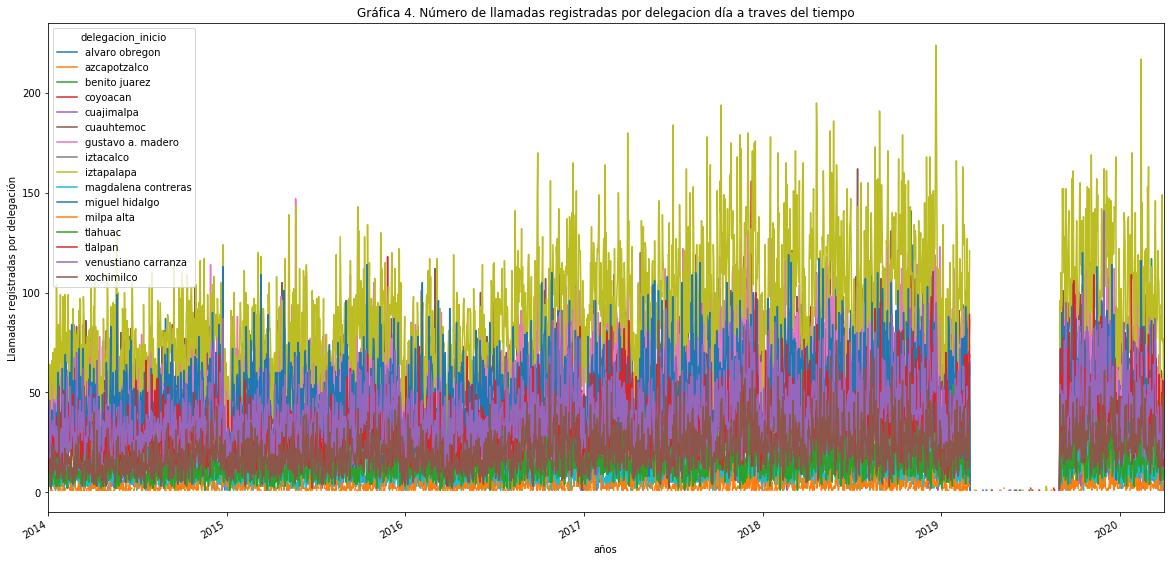

In [73]:
llamadas_por_delegacion=datos_copy.groupby(['fecha_creacion','delegacion_inicio']).folio.count().unstack(level=1).plot()
llamadas_por_delegacion.set(xlabel="años",ylabel="Llamadas registradas por delegación", title="Gráfica 4. Número de llamadas registradas por delegacion día a traves del tiempo")

De acuerdo al gráfico 4, podemos concluir que la delegación que tiene mayor número de llamadas es **Iztapalapa** y la que menor registros tiene es **milpa alta**.

[Text(0, 0.5, 'Llamadas por código de cierre'),
 Text(0.5, 0, 'años'),
 Text(0.5, 1.0, 'Gráfica 5. Número de llamadas registradas según el código de cierre')]

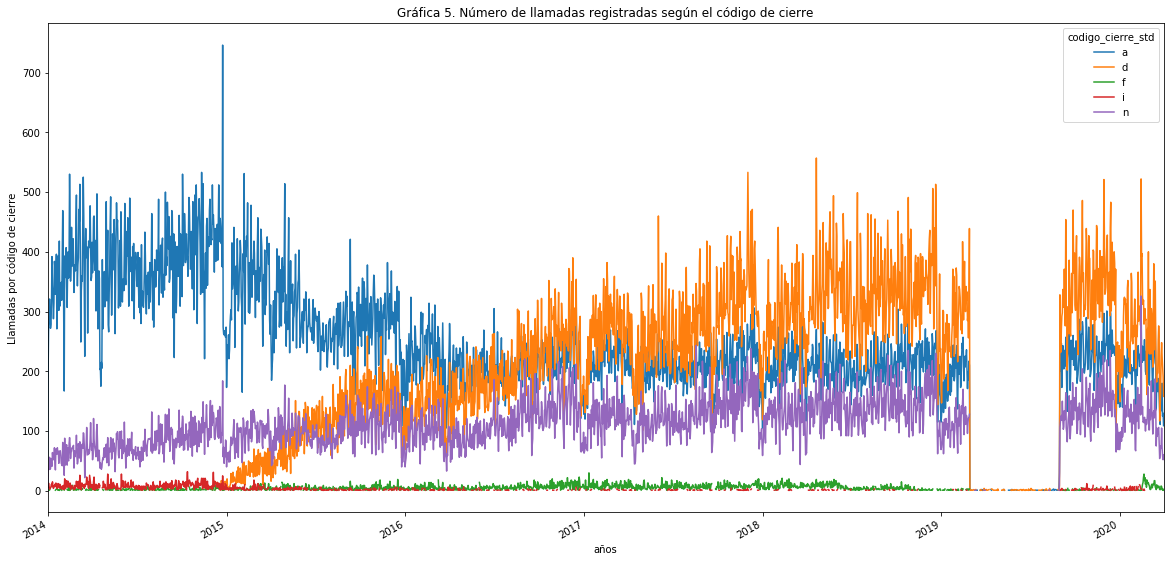

In [74]:
llamadas_por_codigo=datos_copy.groupby(['fecha_creacion','codigo_cierre_std']).folio.count().unstack(level=1).plot()
llamadas_por_codigo.set(xlabel="años",ylabel="Llamadas por código de cierre", title="Gráfica 5. Número de llamadas registradas según el código de cierre")

En la gráfica 5 obtuvimos un comportamiento contrario entre el código de cierre **a** y **d**, ya que a partir de finales del 2016 las llamadas <i>"Afirmativas"</i> comenzaron a decaer y las <i>"Duplicadas"</i> empezaron a tener tendencia positiva.

[Text(0, 0.5, 'Llamadas por tipo de alarma'),
 Text(0.5, 0, 'años'),
 Text(0.5, 1.0, 'Gráfica 6. Número de llamadas registradas según el tipo de alarma')]

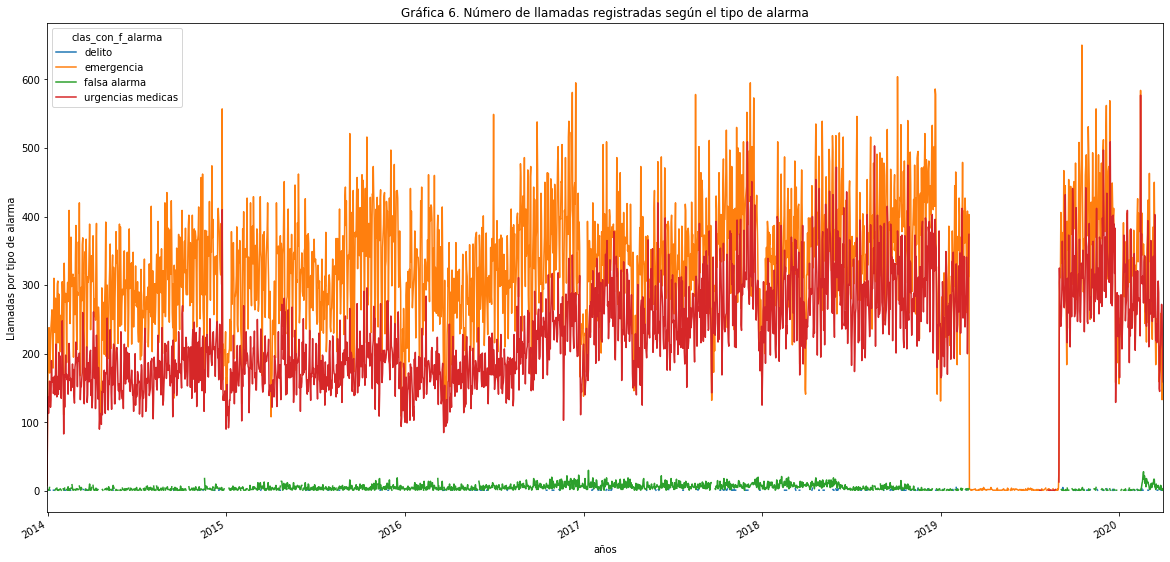

In [25]:
llamadas_por_alarma=datos_copy.groupby(['fecha_creacion','clas_con_f_alarma']).folio.count().unstack(level=1).plot()
llamadas_por_alarma.set(xlabel="años",ylabel="Llamadas por tipo de alarma", title="Gráfica 6. Número de llamadas registradas según el tipo de alarma")

En la gráfica 6 se encontró las llamadas registradas de incidentes viales tienen más número de reportes en la clasificada como **emergencia**.

[Text(0, 0.5, 'Llamadas por tipo de entrada'),
 Text(0.5, 0, 'años'),
 Text(0.5, 1.0, 'Gráfica 7. Número de llamadas registradas según el origen/tipo de entrada')]

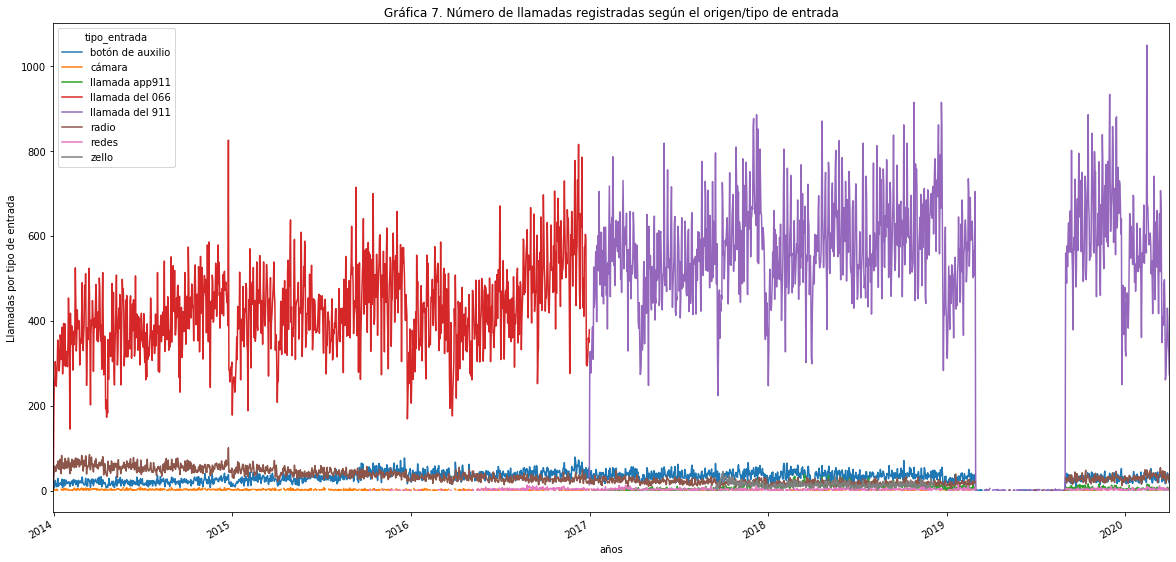

In [26]:
llamadas_tipo_ent=datos_copy.groupby(['fecha_creacion','tipo_entrada']).folio.count().unstack(level=1).plot()
llamadas_tipo_ent.set(xlabel="años",ylabel="Llamadas por tipo de entrada", title="Gráfica 7. Número de llamadas registradas según el origen/tipo de entrada")

De acuerdo a la gráfica 7, se obtuvo que el medio de comunicación más utilizado para reportar un incidente vial fue la llamada al 066 hasta el año 2017, y a apartir de ese momento se empezó a utilizar el la llamada del 911.

[Text(0, 0.5, 'Número de llamadas'),
 Text(0.5, 0, 'hora'),
 Text(0.5, 1.0, 'Gráfica 10. Número de llamadas registradas de acuerdo a la variable target')]

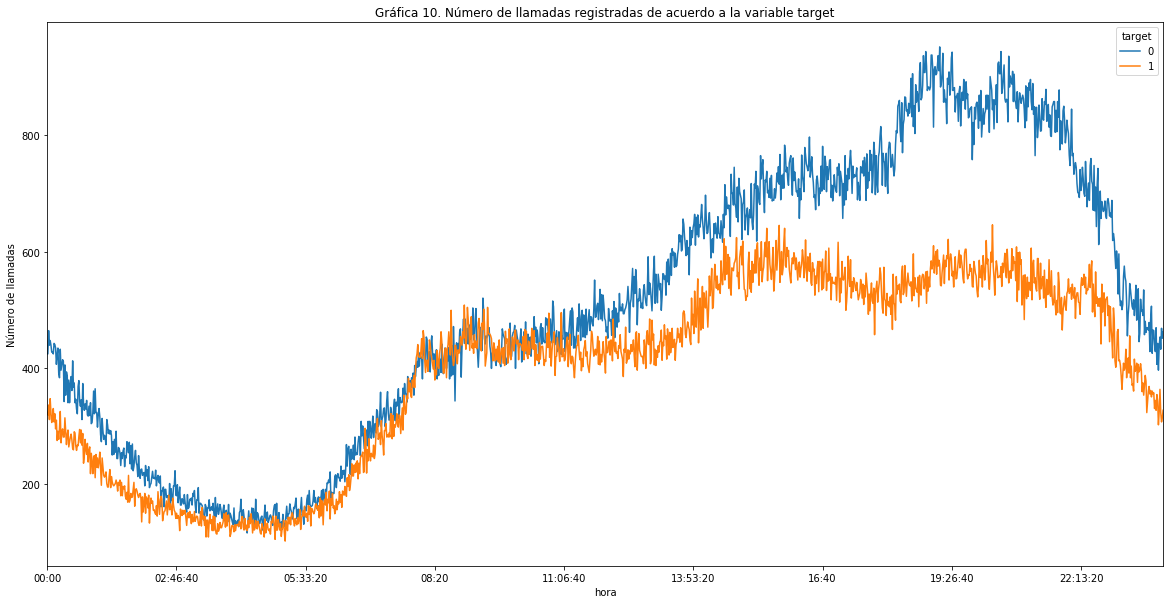

In [38]:
plt.rcParams["figure.figsize"] = (20,10)
llamadas_tipo_ent=datos_copy.groupby(['hora_creacion','target']).folio.count().unstack(level=1).plot()
llamadas_tipo_ent.set(xlabel="hora",ylabel="Número de llamadas", title="Gráfica 10. Número de llamadas registradas de acuerdo a la variable target")


En la gráfica 10, lo que buscamos representar son <i>horas pico</i>, es decir el horario en el cuál se el C5 recibe un mayor número de llamadas, y con la infromación de la gráfica se obtiene que los horarios con más volumen de llamadas son entre las 19:30 y 22:15, de igual forma el número de llamadas tiene a ser menor número de **afirmativas**.

In [95]:
datos_19 = datos_copy[datos_copy.fecha_creacion>'2019-09-01']

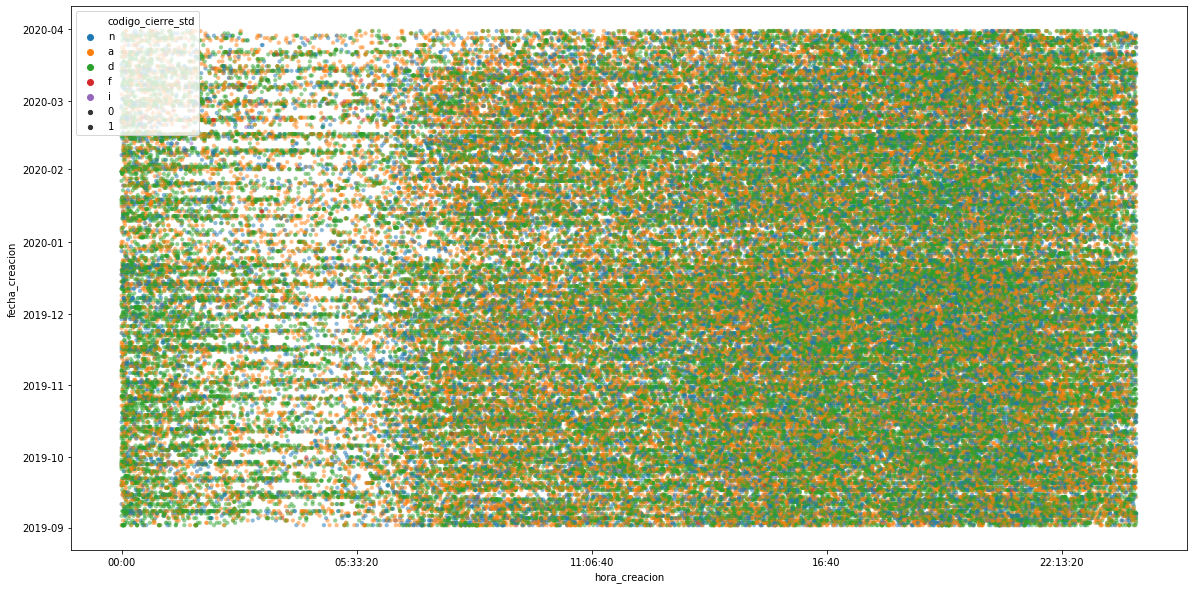

In [98]:
hora_mes = sns.scatterplot(x=datos_19.hora_creacion,
                           y=datos_19.fecha_creacion,
                           hue=datos_19.codigo_cierre_std,
                           linewidth=0, alpha=0.5, size=1)

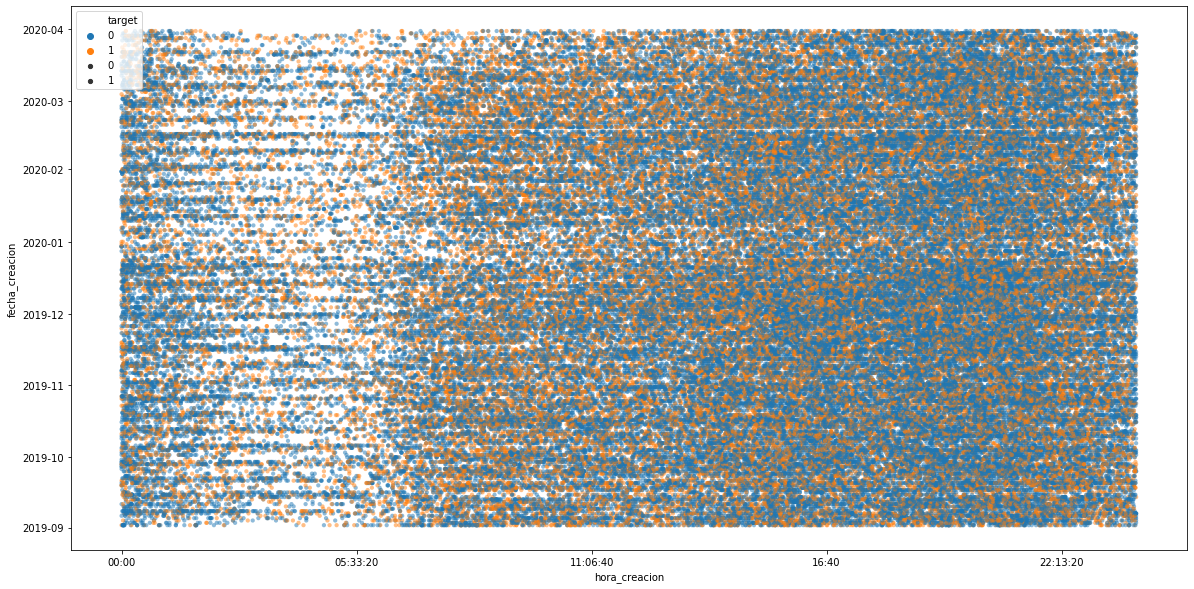

In [99]:
hora_mes = sns.scatterplot(x=datos_19.hora_creacion,
                           y=datos_19.fecha_creacion,
                           hue=datos_19.target,
                           linewidth=0, alpha=0.5, size=1)

##### 4.3 Correlaciones

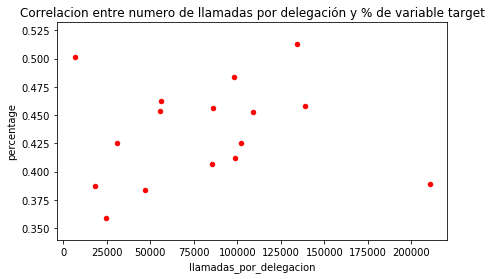

In [61]:
plt.rcParams["figure.figsize"] = (7,4)
result=datos_copy.groupby('delegacion_cierre', as_index=False).agg({"mes": "count", "target": "sum"})
result['percentage'] = result['target']/result['mes']
result=result.rename(columns={"mes": "llamadas_por_delegacion"})
result=result.plot(kind='scatter',x='llamadas_por_delegacion',y='percentage',color='red')
result.set(title="Correlacion entre numero de llamadas por delegación y % de variable target")
plt.show()

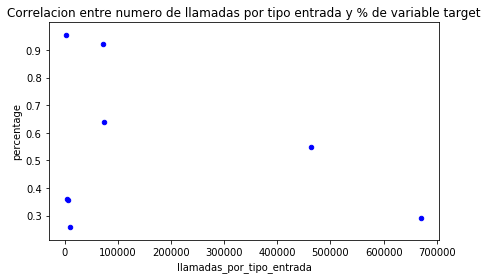

In [62]:
result=datos_copy.groupby('tipo_entrada', as_index=False).agg({"mes": "count", "target": "sum"})
result['percentage'] = result['target']/result['mes']
result=result.rename(columns={"mes": "llamadas_por_tipo_entrada"})
result=result.plot(kind='scatter',x='llamadas_por_tipo_entrada',y='percentage',color='blue')
result.set(title="Correlacion entre numero de llamadas por tipo entrada y % de variable target")
plt.show()

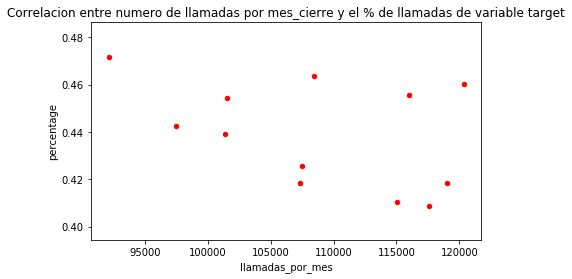

In [63]:
result=datos_copy.groupby('mes_cierre', as_index=False).agg({"mes": "count", "target": "sum"})
result['percentage'] = result['target']/result['mes']
result=result.rename(columns={"mes": "llamadas_por_mes"})
result=result.plot(kind='scatter',x='llamadas_por_mes',y='percentage',color='red')
result.set(title="Correlacion entre numero de llamadas por mes_cierre y el % de llamadas de variable target")
plt.show()

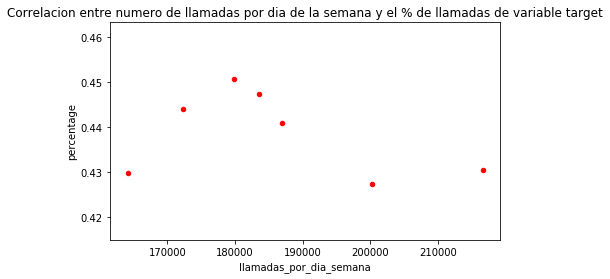

In [64]:
result=datos_copy.groupby('dia_semana', as_index=False).agg({"mes": "count", "target": "sum"})
result['percentage'] = result['target']/result['mes']
result=result.rename(columns={"mes": "llamadas_por_dia_semana"})
result=result.plot(kind='scatter',x='llamadas_por_dia_semana',y='percentage',color='red')
result.set(title="Correlacion entre numero de llamadas por dia de la semana y el % de llamadas de variable target")
plt.show()

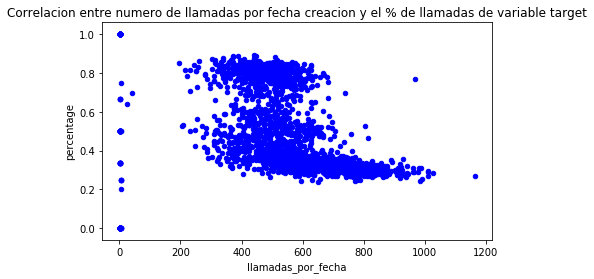

In [65]:
result=datos_copy.groupby('fecha_creacion', as_index=False).agg({"mes": "count", "target": "sum"})
result['percentage'] = result['target']/result['mes']
result=result.rename(columns={"mes": "llamadas_por_fecha"})
#result=result.plot(kind='scatter',x='llamadas_por_fecha',y='percentage',color='blue')
result=result.plot.scatter(x='llamadas_por_fecha',y='percentage',color='blue')
result.set(title="Correlacion entre numero de llamadas por fecha creacion y el % de llamadas de variable target")
plt.show()

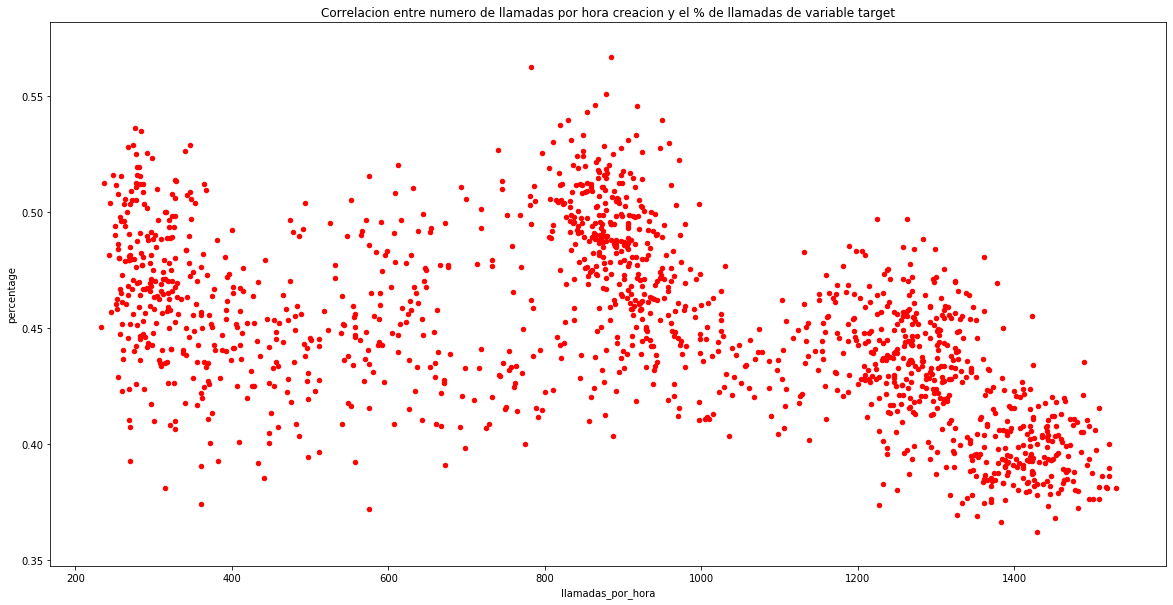

In [78]:
result=datos_copy.groupby('hora_creacion', as_index=False).agg({"mes": "count", "target": "sum"})
result['percentage'] = result['target']/result['mes']
result=result.rename(columns={"mes": "llamadas_por_hora"})
result=result.plot(kind='scatter',x='llamadas_por_hora',y='percentage',color='red')
result.set(title="Correlacion entre numero de llamadas por hora creacion y el % de llamadas de variable target")
plt.show()

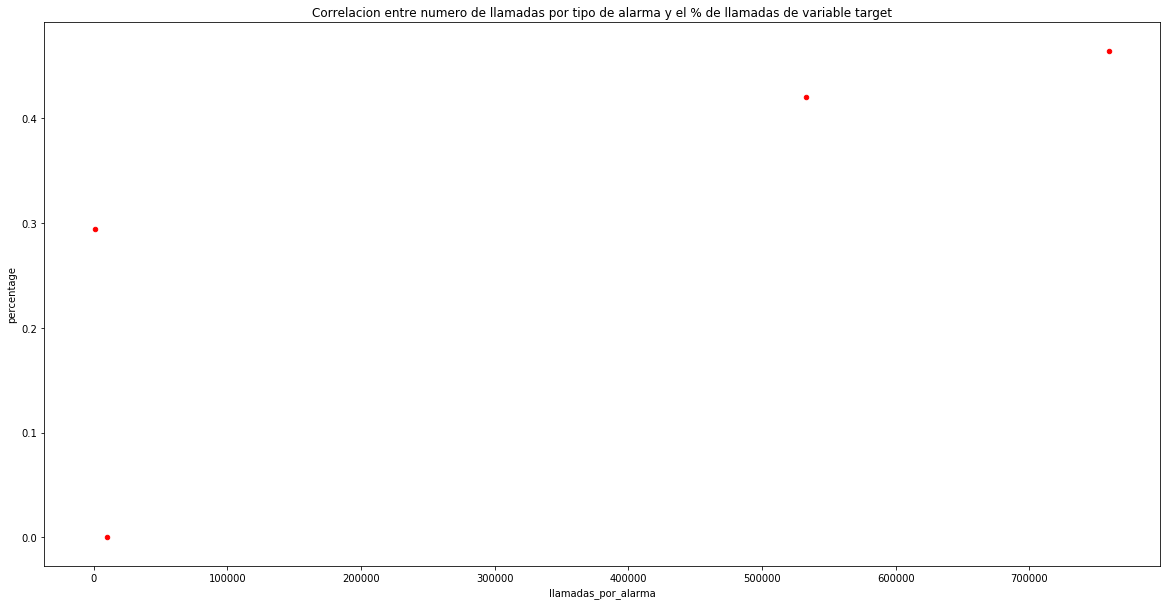

In [88]:
result=datos_copy.groupby('clas_con_f_alarma', as_index=False).agg({"mes": "count", "target": "sum"})
result['percentage'] = result['target']/result['mes']
result=result.rename(columns={"mes": "llamadas_por_alarma"})
result=result.plot(kind='scatter',x='llamadas_por_alarma',y='percentage',color='red')
result.set(title="Correlacion entre numero de llamadas por tipo de alarma y el % de llamadas de variable target")
plt.show()

In [89]:
datos_copy.shape

(1303778, 17)

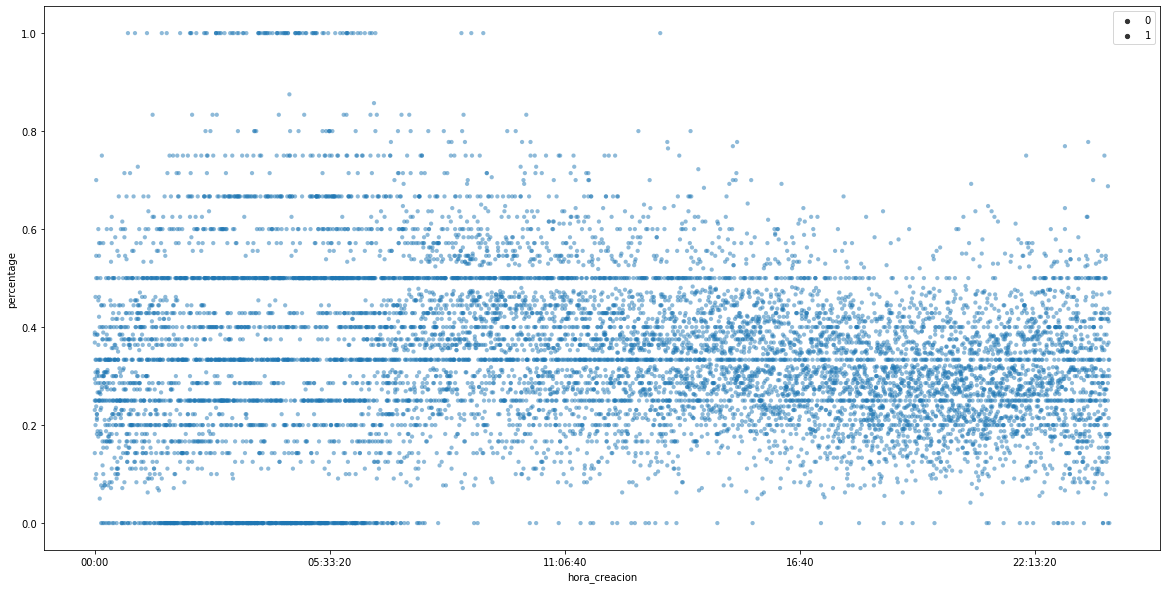

In [100]:
result=datos_19.groupby(['año_cierre','mes_cierre','hora_creacion'], as_index=False).agg({"mes": "count", "target": "sum"})
result['percentage'] = result['target']/result['mes']
result.head()
hora_porc = sns.scatterplot(x=result.hora_creacion,
                            y=result.percentage,
                            linewidth=0, alpha=0.5, size=1)
result.set(title="Correlacion entre hora_creacion y el % de llamadas de variable target")
# plt.show()